# Perusahaan Asuransi Sure Tomorrow

# Daftar Isi <a id='back'></a>

* [Pendahuluan](#intro)

* [Tahap 1. Ikhtisar Data](#data_review)
    * [1.1 Kesimpulan](#review_conclusion)

* [Tahap 2. Pra-pemrosesan data](#data_preprocessing)
    * [2.1 Menyeragamkan nama kolom](#dataprep_1)
    * [2.2 Menyesuaikan tipe data](#dataprep_2)
    * [2.3 Menangani duplicated value](#dataprep_3)
    * [2.4 Kesimpulan](#dataprep_conclusion)    
    
* [Tahap 3. Analisis](#analysis)
    * [3.1 EDA](#analysis_1)
    * [3.2 Tugas 1. Klien yang Mirip](#analysis_2)
    * [3.3 Tugas 2. Apakah klien kemungkinan menerima klaim asuransi?](#analysis_3)
    * [3.4 Tugas 3. Regresi (dengan Regresi Linear](#analysis_4)
    * [3.5 Tugas 4. Pengaburan Data](#analysis_4)
    * [3.6 Kesimpulan](#analysis_conclusion)


* [Tahap 4. Pengujian](#test)
    * [4.1 Membuktikan Bahwa Pengaburan Data Bisa Bekerja dengan LR](#test_1)
    * [4.2 Melakukan Pengujian Regresi Linear dengan Pengaburan Data](#test_2)
    * [4.2.1 Membuat model regresi linier untuk data asli](#test_2_1)
    * [4.2.2 Membuat model regresi linier untuk data yang dikaburkan](#test_2_2)

* [Temuan](#end)

# Pendahuluan <a id='intro'></a>

Perusahaan asuransi bernama "Sure Tomorrow" ingin menyelesaikan beberapa masalah dengan bantuan machine learning. Anda pun diminta untuk mengevaluasi kemungkinan tersebut.

- Tugas 1: Temukan klien yang mirip dengan kriteria klien tertentu. Tugas ini akan memudahkan perusahaan untuk melakukan pemasaran.
- Tugas 2: Prediksi apakah klien baru kemungkinan akan mengambil klaim asuransi. Apakah prediksi model lebih baik daripada prediksi model *dummy*?
- Tugas 3: Prediksi besaran klaim asuransi yang mungkin diterima klien baru menggunakan model regresi linear.
- Tugas 4: Lindungi data pribadi klien tanpa merusak model dari tugas sebelumnya. Sangatlah penting untuk mengembangkan algoritme transformasi data yang dapat mencegah penyalahgunaan informasi pribadi klien jika data tersebut jatuh ke tangan yang salah. Hal ini disebut penyembunyian data atau pengaburan data. Namun, prosedur perlindungan datanya pun perlu diperhatikan agar kualitas *model machine* learning tidak menurun. Di sini, Anda tidak perlu memilih model yang terbaik, cukup buktikan bahwa algoritme Anda bekerja secara akurat.


### Tujuan: 
Kali ini, peneliti memiliki tujuan sebagi berikut:
- Menemmukan klien yang mirip dengan kriteria klien tertentu
- Memprediksi apakah klien baru kemungkinan akan mengambil klaim asuransi dan apakah prediksi model lebih baik daripada prediksi model *dummy*.
- Memrediksi besaran klaim asuransi yang mungkin diterima klien baru menggunakan model regresi linear.
- Melindungi data pribadi klien tanpa memengaruhi kualitas model machine learning yang digunakan. 


### Tahapan
Peneliti memiliki data terkait para klien yang disimpan dalam *file*:
- /datasets/insurance_us.csv

Tidak ada informasi terkait kualitas data tersebut, jadi perlu diperiksa terlebih dahulu sebelum melakukan analisis lebih lanjut.

Pertama akan dilakukan evaluasi kualitas data dan melihat apakah terdapat hal yang signifikan yang perlu dilakukan tindak lanjut sebelum dilakukan proses analisis.

Proyek ini akan terdiri dari empat tahap:
 1. Ikhtisar Data
 2. Pra-pemrosesan Data 
 3. Analisis
 4. Pengujian
 
 Terkai dengan kebutuhan ML:
 - **Feature**: jenis kelamin, usia, gaji, dan jumlah anggota keluarga tertanggung
- **Target**: jumlah manfaat asuransi yang diterima tertanggung selama lima tahun terakhir

[Kembali ke Daftar Isi](#back)

# Tahap 1. Ikhtisar Data <a id='data_review'></a>

Melakukan import library yang diperlukan, membuka data terkait yang akan dievaluasi, kemudian menjelajahi data tersebut.

**Step 1.1**
Melakukan import libraries dan modules yang diperlukan.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.linear_model
from sklearn.metrics import confusion_matrix, f1_score, mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
from IPython.display import display

**Step 1.2**
Melakukan load data yang diperlukan dari file *insurance_us.csv* dan memeriksa dataframe secara umum.

In [2]:
try:
    df = pd.read_csv('insurance_us.csv')
except:
    df = pd.read_csv('/datasets/insurance_us.csv')
#membaca file csv dan konversi ke dataframe df

df.head() 
#melihat 5 baris awal dari dataframe df

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Nama kolom terlihat kurang sesuai dengan style yang berlaku umum. Untuk selanjutnya dapat disesuaikan.

In [3]:
df.info()
#informasi umum dari dataframe df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              5000 non-null   int64  
 1   Age                 5000 non-null   float64
 2   Salary              5000 non-null   float64
 3   Family members      5000 non-null   int64  
 4   Insurance benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Tipe data float pada kolom age kurang sesuai. Untuk selanjutnya dapat diubah ke tipe data int.

In [4]:
df.describe()
#mendapatkan data statistika deskriptif dari dataframe df

,Gender,Age,Salary,Family members,Insurance benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**Step 1.3**
Memeriksa missing value

In [5]:
df.isna().sum()
#memeriksa missing value dari dataframe df

Gender                0
Age                   0
Salary                0
Family members        0
Insurance benefits    0
dtype: int64

Tidak terdapat missing values pada dataframe df.

**Step 1.4**
Memeriksa duplicated value

In [6]:
df.duplicated().sum()
#memeriksa duplicated value dari dataframe df

153

In [7]:
df.duplicated().sum()/len(df)*100
#menghitung porsi duplicated value

3.06

Terdapat 153 baris duplicated value pada dataframe df, atau 3% of the entire data, dengan demikian untuk selanjutnya kita dapat melakukan penghapusan baris tersebut.

## Kesimpulan <a name="review_conclusion"></a>
- Terdapat 5000 baris dan 5 kolom.
- Kolomnya adalah Gender, Age, Income, Family members, Insurance benefits
- Tidak terdapat missing value
- Terdapat 153 baris duplikat yang merupakan 3% seluruh data

[Kembali ke Daftar Isi](#back)

# Tahap 2. Pra-pemrosesan Data <a id='data_preprocessing'></a>

Melakukan perbaikan data untuk persiapan pemrosesan data lebih lanjut.

## Menyeragamkan nama kolom <a name="dataprep_1"></a>

**Step 2.1**
Melakukan penyeragaman nama kolom agar terlihat lebih sesuai dengan style yang berlaku umum.

In [8]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})
#menyeragamkan nama kolom

Memeriksa hasil penyeragaman nama kolom.

In [9]:
df.sample()
#memeriksa baris secara acak

,gender,age,income,family_members,insurance_benefits
3308,0,32.0,46600.0,1,0


## Menyesuaikan tipe data <a name="dataprep_2"></a>

**Step 2.2**
Melakukan penyesuaian tipe data kolom age dari float ke int.

In [10]:
df['age'] = df['age'].astype(int)
#mengubah tipe data age dari float ke int

In [11]:
df.dtypes
#memeriksa kembali tipe data dataframe df

gender                  int64
age                     int32
income                float64
family_members          int64
insurance_benefits      int64
dtype: object

## Menangani duplicated value <a name="dataprep_3"></a>

**Step 2.3**
Melakukan penghapusan 153 item duplikat atau 3 % dari keseluruhan data.

In [12]:
df = df.drop_duplicates()
#menghapus baris yang berisi duplicated value

In [13]:
df.duplicated().sum()
#memeriksa kembali duplicated value pada dataframe df

0

## Kesimpulan <a name="dataprep_conclusion"></a>
- Nama kolom telah disesuaikan menjadi gender, age, income, family_members, insurance_benefits
- Tipe data kolom age telah diganti dari float menjadi int
- Baris yang berisi duplicated value telah dihapus

[Kembali ke Daftar Isi](#back)

# Tahap 3. Analisis <a name='analysis'></a>

## EDA<a class="anchor" id="analysis_1"></a>

Mari kita periksa dengan cepat, apakah ada kelompok pelanggan tertentu dengan melihat plot pasangan?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


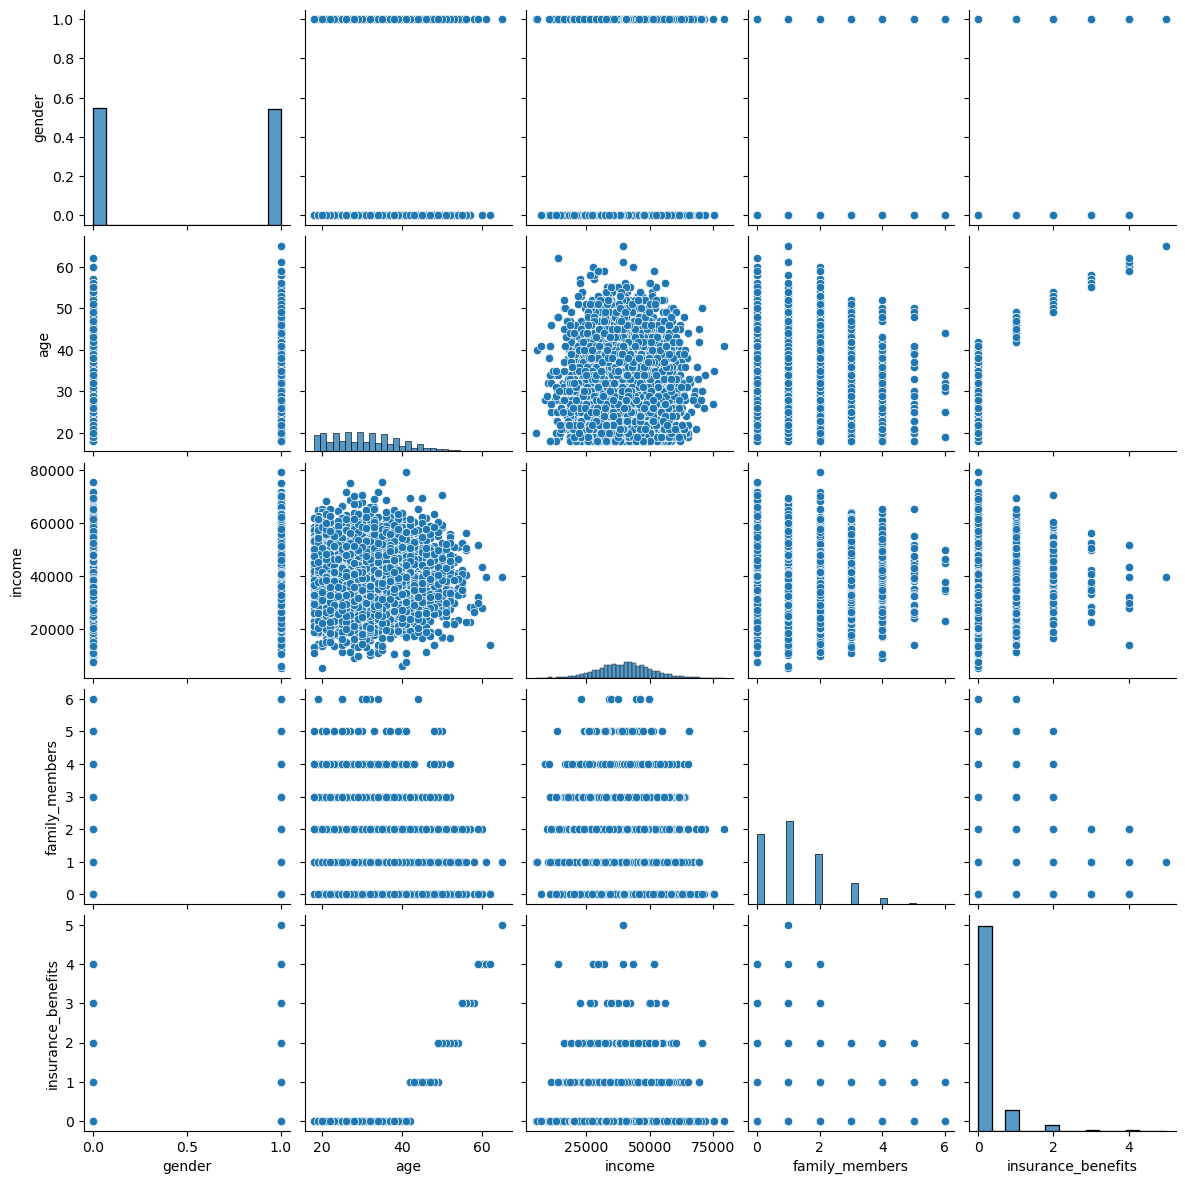

In [14]:
g = sns.pairplot(df)
g.fig.set_size_inches(12, 12)

Baiklah, sepertinya agak sulit untuk melihat kelompok (klaster) yang jelas mengingat sulitnya menggabungkan beberapa variabel secara bersamaan (untuk menganalisis distribusi multivariat). Namun, itulah gunanya LA dan ML di sini.

- Terdapat korelasi positif yang sangat kuat antara usia dan manfaat asuransi.
- Terdapat korelasi negatif yang lemah antara anggota keluarga dan manfaat asuransi.
- Distribusi histogramnya miring ke kanan
- Clusternya tidak jelas, oleh karena itu perlu dikembangkan prosedur ML yang dapat menyelesaikan masalah ini dengan algoritma KNN.

## Tugas 1. Klien yang Mirip <a name='analysis_2'></a>

Dalam bahasa pemrograman ML, penting untuk mengembangkan prosedur yang bisa menentukan *k-nearest neighbors* (objek) pada objek tertentu berdasarkan jarak antar objek.

Anda mungkin ingin mengulas kembali pelajaran berikut (bab -> pelajaran)
- Jarak Antar Vektor -> Jarak Euklides
- Jarak Antar Vektor -> Jarak Manhattan

Untuk menyelesaikan tugas ini, kita bisa mencoba beberapa metrik jarak.

Buatlah sebuah fungsi yang menampilkan *k-nearest neighbors* terdekat untuk objek ke-n berdasarkan metrik jarak tertentu.  Besarnya klaim asuransi yang diterima tidak perlu diperhitungkan dalam tugas ini.

Anda bisa menggunakan implementasi algoritme kNN yang sudah tersedia di Scikit-learn  (periksa [tautan](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors) ini) atau menggunakan punya Anda sendiri.

Uji algoritme tersebut untuk empat kombinasi dari dua kasus
- Penskalaan
  - data tidak diskalakan
  - data diskalakan dengan [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) 
- Metrik Jarak
  - Euklides
  - Manhattan

Jawablah pertanyaan-pertanyaan berikut:
- Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?
- Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?

In [15]:
df = df.reset_index(drop=True) 

In [16]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [17]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = NearestNeighbors(n_neighbors=k, metric = metric).fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)

    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Mengatur skala data.

In [18]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [19]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
1096,0,0.292308,0.541772,0.333333,0
3958,1,0.353846,0.593671,0.000000,0
3236,1,0.507692,0.644304,0.500000,0
1664,1,0.307692,0.400000,0.333333,0
4626,1,0.723077,0.573418,0.000000,1


Sekarang, mari kita dapatkan catatan yang mirip untuk setiap kombinasi yang ada

- Menggunakan n = 10, dan k = 10 untuk sampel.
- n : objek no yang dicari nearest neighbours-nya
- k : banyaknya nearest neighbours yang kembali

In [20]:
df.iloc[10][feature_names]

gender                1.0
age                  25.0
income            36600.0
family_members        1.0
Name: 10, dtype: float64

In [21]:
n = 10
k = 10
df_metric = ['euclidean','manhattan']

Dengan data yang tidak berskala.

In [22]:
for metric in df_metric:
    print(metric)
    print(get_knn(df, n, k , metric))

euclidean
      gender  age   income  family_members  insurance_benefits  distance
10         1   25  36600.0               1                   0  0.000000
3924       1   25  36600.0               2                   0  1.000000
2007       1   26  36600.0               0                   0  1.414214
3169       1   26  36600.0               2                   0  1.414214
1492       0   26  36600.0               0                   0  1.732051
1919       0   24  36600.0               0                   0  1.732051
2825       0   23  36600.0               0                   0  2.449490
1556       0   27  36600.0               2                   0  2.449490
49         0   28  36600.0               1                   0  3.162278
4648       1   29  36600.0               2                   0  4.123106
manhattan
      gender  age   income  family_members  insurance_benefits  distance
10         1   25  36600.0               1                   0       0.0
3924       1   25  36600.0     

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Dengan data yang berskala.

In [23]:
for metric in df_metric:
    print(metric)
    print(get_knn(df_scaled, n, k , metric))

euclidean
      gender       age    income  family_members  insurance_benefits  distance
10         1  0.384615  0.463291        0.166667                   0  0.000000
4243       1  0.384615  0.473418        0.166667                   0  0.010127
1374       1  0.369231  0.464557        0.166667                   0  0.015437
756        1  0.369231  0.462025        0.166667                   0  0.015437
2219       1  0.400000  0.455696        0.166667                   0  0.017157
3181       1  0.400000  0.473418        0.166667                   0  0.018418
4112       1  0.369231  0.446835        0.166667                   0  0.022527
4078       1  0.400000  0.446835        0.166667                   0  0.022527
2555       1  0.400000  0.444304        0.166667                   0  0.024438
26         1  0.384615  0.437975        0.166667                   0  0.025316
manhattan
      gender       age    income  family_members  insurance_benefits  distance
10         1  0.384615  0.463291

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


**Apakah data yang tidak berskala memengaruhi algoritme kNN? Jika berpengaruh, lalu bagaimanakah bentuknya?**

Ya, data yang tidak berskala mempengaruhi algoritma KNN. Data yang tidak berskala memiliki nilai jarak yang lebih besar dibandingkan data yang berskala. Indeks jarak dan hasilnya memiliki objek serupa yang berbeda di dalamnya.

**Seberapa mirip hasil yang Anda dapatkan dari metrik Euklides dengan saat Anda menggunakan metrik jarak Manhattan (abaikan ada atau tidaknya skala)?**

Hasilnya sangat berbeda, jarak Manhattan untuk data tidak berskala memberikan hasil indeks 10, 3924, 2007, 3169, 1492, 1919, 49, 2825, 1556, dan 4648. Untuk data berskala memberikan hasil indeks 10, 4243, 1374, 756, 2219, 26, 3181, 4112, 4078, dan 4008. Jadi tidak ada indeks pencocokan yang sama. Hasil jarak untuk data berskala memiliki desimal dan presisi yang lebih detail dibandingkan data tidak berskala.

## Tugas 2. Apakah klien kemungkinan menerima klaim asuransi? <a name='analysis_3'></a>

Dalam konteks *machine learning*, tugas ini sama seperti tugas klasifikasi biner.

Dengan target insurance_benefits yang lebih dari nol, coba evaluasi apakah model klasifikasi kNN merupakan pendekatan yang lebih baik daripada model *dummy*.

Instruksi:
- Buat pengklasifikasi berbasis KNN dan ukur kualitasnya dengan metrik F1 untuk k=1..10 bagi data asli dan data yang diskalakan. Akan menarik untuk melihat bagaimana k dapat memengaruhi metrik evaluasi, dan apakah penskalaan data membuat hasilnya berbeda. Gunakan implementasi algoritme klasifikasi kNN yang tersedia di Scikit-learn (periksa [tautan ini](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) atau gunakan milik Anda sendiri.
- Buat model *dummy* yang acak untuk kasus ini. Model tersebut harusnya menampilkan "1" dengan beberapa probabilitas. Mari kita uji model dengan empat nilai probabilitas: 0, probabilitas membayar benefit asuransi apa pun; 0,5; 1.

Probabilitas membayar klaim asuransi dapat didefinisikan sebagai

$$
P\{\text{klaim asuransi yang diterima}\}=\frac{\text{jumlah klien yang menerima klaim asuransi}}{\text{jumlah klien secara keseluruhan}}.
$$

Pisahkan keseluruhan data menjadi 70:30 untuk proporsi *training* dan *test set*.

In [24]:
df['insurance_benefits_received']=(df['insurance_benefits']>0).astype(int)
df['insurance_benefits_received']
#menghitung target

0       0
1       1
2       0
3       0
4       0
       ..
4842    0
4843    0
4844    0
4845    0
4846    0
Name: insurance_benefits_received, Length: 4847, dtype: int32

insurance_benefits_received
0    0.883846
1    0.116154
Name: proportion, dtype: float64


<Axes: xlabel='insurance_benefits_received'>

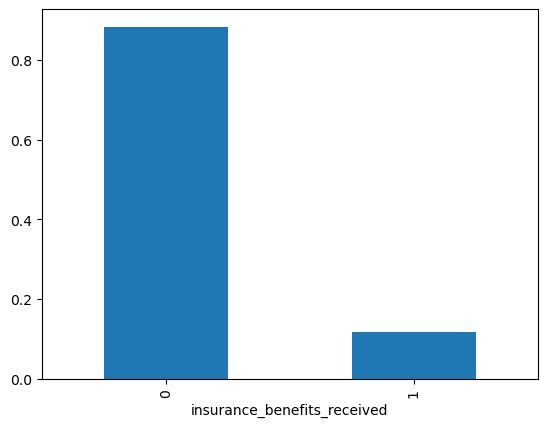

In [25]:
class_frequency = df['insurance_benefits_received'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')
#memeriksa class imbalance dengan menampilkan porsi data

In [26]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# jika Anda memiliki masalah dengan baris berikut, muat ulang kernel dan jalankan notebook kembali
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriks Kesalahan')
    print(cm)

In [27]:
# menghasilkan output dari model acak

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

Karena terdapat class imbalance, kita akan menggunakan stratify.

In [28]:
train, test = train_test_split(df, test_size=0.3, stratify=df['insurance_benefits_received'], random_state=12345)

X_train = train[feature_names]
X_test = test[feature_names]
y_train = train['insurance_benefits_received']
y_test = test['insurance_benefits_received']

In [29]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
eval_classifier(y_test, knn.predict(X_test))

F1: 0.40
Matriks Kesalahan
[[0.87147766 0.01237113]
 [0.0838488  0.03230241]]


In [32]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    
    y_pred_rnd = rnd_model_predict(P, y_test.shape[0])
        
    eval_classifier(y_test, y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Matriks Kesalahan
[[0.8838488 0.       ]
 [0.1161512 0.       ]]

The probability: 0.12
F1: 0.11
Matriks Kesalahan
[[0.7766323  0.10721649]
 [0.10309278 0.01305842]]

The probability: 0.50
F1: 0.19
Matriks Kesalahan
[[0.44742268 0.43642612]
 [0.05704467 0.05910653]]

The probability: 1.00
F1: 0.21
Matriks Kesalahan
[[0.        0.8838488]
 [0.        0.1161512]]



- Terdapat class imbalance, untuk perhitungan kita menggunakan parameter stratifikasi
- Klasifikasi KNN memiliki skor F1 0,4
- Model dummy memiliki skor F1 tertinggi 0,21
- Pendekatan klasifikasi KNN dengan skor F1 lebih tinggi lebih baik dibandingkan model dummy

## Tugas 3. Regresi (dengan Regresi Linear) <a name='analysis_4'></a>

Dengan `insurance_benefit` sebagai target, evaluasi berapa RMSE untuk model Regresi Linear.

Buat implementasi LR Anda sendiri. Untuk itu, coba ingat-ingat kembali bagaimana solusi tugas regresi linear dirumuskan dalam bentuk LA. Periksa RMSE untuk data asli maupun data yang telah diskalakan. Bisakah Anda melihat perbedaan RMSE di antara kedua kasus ini?

Tunjukkan
- $X$ — matriks fitur, satu baris merepresentasikan satu kasus, tiap kolom adalah fitur, kolom pertama terdiri dari satuan
- $y$ — target (vektor)
- $\hat{y}$ — estimasi target (vektor)
- $w$ — bobot vektor

Matriks untuk regresi linear dapat dirumuskan sebagai

$$
y = Xw
$$

Tujuan pelatihan untuk menemukan $w$ yang akan meminimalkan jarak L2 (MSE) antara $Xw$ dan $y$:

$$
\min_w d_2(Xw, y) \quad \text{atau} \quad \min_w \text{MSE}(Xw, y)
$$

Sepertinya ada solusi analitis untuk masalah di atas:

$$
w = (X^T X)^{-1} X^T y
$$

Rumus di atas bisa digunakan untuk menemukan bobot $w$ dan yang terakhir dapat digunakan untuk menghitung nilai prediksi

$$
\hat{y} = X_{val}w
$$

Pisahkan keseluruhan data menjadi *training set* dan *validation set* dengan proporsi 70:30. Gunakan metrik RMSE untuk evaluasi model.

In [33]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # menyatukan hasil
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv((X2.T).dot(X2)).dot(X2.T).dot(y)

    def predict(self, X):
        
        # menyatukan hasil
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2.dot(self.weights)
        
        return y_pred

In [34]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [35]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


- Nilai RMSE berkisar antara 0,2 dan 0,5 di mana hal ini menunjukkan bahwa model relatif dapat memprediksi data
- RMSE Regresi Linier ini adalah sebesar 0,36 di mana hal ini menunjukkan model yang bagus dan dapat memprediksi data secara akurat
- R2 adalah ukuran statistik seberapa dekat data dengan garis regresi yang digunakan (fitted). Koefisien ini juga dikenal sebagai koefisien determinasi, yang berkisar dari nol hingga satu, dengan nol menunjukkan bahwa model yang diusulkan tidak meningkatkan prediksi terhadap model rata-rata, dan satu menunjukkan prediksi sempurna bahwa model tersebut menjelaskan semua variabilitas data respons di sekitar nilai rata-ratanya (mean). Dengan skor R2 0,66 menunjukkan bahwa 66% data telah sesuai (fit) dengan model regresi.

## Tugas 4. Pengaburan Data <a name='analysis_5'></a>

Cara terbaik untuk mengaburkan data adalah dengan mengalikan fitur-fitur numerik (ingat bahwa fitur-fitur tersebut bisa di lihat di matriks $X$) dengan matriks yang dapat dibalik (*invertible*) $P$. 

$$
X' = X \times P
$$

Coba lakukan itu dan periksa bagaimana nilai fitur akan terlihat setelah transformasi. Sifat *invertible* sangat penting pada kasus ini, jadi pastikan $P$ bahwa $P$ bersifat *invertible*.

Anda mungkin ingin meninjau kembali pelajaran 'Matriks dan Operasi Matriks -> Perkalian Matriks' untuk mengingat aturan perkalian matriks dan implementasinya dengan NumPy.

In [36]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [37]:
X = df_pn.to_numpy()

Membuat matriks acak $P$.

In [38]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Memeriksa apakah matriks $P$ *invertible*

- AB = BA =I
- $ AA^{-1} = A^{-1}A $ = I

In [39]:
np.matmul(P, np.linalg.inv(P))

array([[ 1.00000000e+00, -1.66533454e-16,  0.00000000e+00,
         8.32667268e-17],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         6.93889390e-17],
       [ 0.00000000e+00, -1.11022302e-16,  1.00000000e+00,
         6.93889390e-17],
       [-2.28983499e-16, -3.88578059e-16, -5.55111512e-17,
         1.00000000e+00]])

Matrix P adalah invertible

Bisakah Anda menebak usia klien atau pendapatannya setelah dilakukan transformasi?

Tidak

Bisakah Anda memulihkan data asli dari $X'$ jika $P$ sudah diketahui? Coba periksa hal tersebut melalui perhitungan dengan memindahkan $P$ dari sisi kanan rumus di atas ke sisi kiri. Aturan perkalian matriks sangat berguna di sini.

Ya, kita bisa memulihkan data asli dari $X'$ jika kita sudah mengetahui $P$

In [40]:
np.matmul((X.dot(P)),np.linalg.inv(P))

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [-3.18323146e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [ 1.36424205e-12,  2.90000000e+01,  2.10000000e+04,
         0.00000000e+00],
       ...,
       [ 4.54747351e-13,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Tampilkan ketiga kasus untuk beberapa klien
- Data asli
- Data yang sudah ditransformasikan
- Data yang telah dipulihkan ke semula

In [41]:
# data asli
print(X)

[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 ...
 [0.00e+00 2.00e+01 3.39e+04 2.00e+00]
 [1.00e+00 2.20e+01 3.27e+04 3.00e+00]
 [1.00e+00 2.80e+01 4.06e+04 1.00e+00]]


In [42]:
# data yang sudah ditransformasikan
print(X.dot(P))

[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 ...
 [ 4346.2234249  15289.24126492 12586.16264392 31433.50888552]
 [ 4194.09324155 14751.9910242  12144.02930637 30323.88763426]
 [ 5205.46827354 18314.24814446 15077.01370762 37649.59295455]]


In [43]:
# data yang telah dipulihkan ke semula
print(np.matmul((X.dot(P)),np.linalg.inv(P)))

[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-3.18323146e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [ 1.36424205e-12  2.90000000e+01  2.10000000e+04  0.00000000e+00]
 ...
 [ 4.54747351e-13  2.00000000e+01  3.39000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.20000000e+01  3.27000000e+04  3.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  4.06000000e+04  1.00000000e+00]]


Mungkin Anda bisa melihat bahwa terdapat beberapa nilai yang tidak benar-benar sama dengan data sebelum ditransformasi. Kenapa bisa begitu?

Ya benar, nilainya tidak sama dengan data aslinya. Data asli kolom pertama baris ketiga adalah 0 tetapi yang dipulihkan -6.23021448e-1. Alasannya mungkin karena nilai P bersifat acak dan $PP^{-1}$ sangat mendekati matriks identitas dengan beberapa bilangan tidak sama dengan nol tetapi sangat mendekati nol meski secara hipotesis merupakan matriks identitas.

## Kesimpulan <a name="analysis_conclusion"></a>

Analisis EDA
- Terdapat korelasi positif yang sangat kuat antara usia dan manfaat asuransi.
- Terdapat korelasi negatif yang lemah antara anggota keluarga dan manfaat asuransi.
- Distribusi histogramnya miring ke kanan
- Clusternya tidak jelas, oleh karena itu perlu dikembangkan prosedur ML yang dapat menyelesaikan masalah ini dengan algoritma KNN.

Analisis Tugas 1
- Data yang tidak berskala mempengaruhi algoritma KNN
- Hasil perbandingan jarak untuk data berskala dan tidak berskala sangat berbeda, baik secara urutan index maupun nominal jarak. Untuk data berskala memberikan hasil indeks 10, 4243, 1374, 756, 2219, 26, 3181, 4112, 4078, dan 4008 sedangkan Untuk data tidak berskala memberikan hasil indeks 10, 3924, 2007, 3169, 1492, 1919, 49, 2825, 1556, dan 4648. Untuk data berskala memiliki desimal dan presisi yang lebih detail dibandingkan data tidak berskala.

Analisis Tugas 2
- Terdapat class imbalance, untuk perhitungan kita menggunakan parameter stratifikasi
- Klasifikasi KNN memiliki skor F1 0,4
- Model dummy memiliki skor F1 tertinggi 0,21
- Pendekatan klasifikasi KNN dengan skor F1 lebih tinggi lebih baik dibandingkan model dummy

Analisis Tugas 3
- Nilai RMSE berkisar antara 0,2 dan 0,5 di mana hal ini menunjukkan bahwa model relatif dapat memprediksi data
- RMSE Regresi Linier ini adalah sebesar 0,36 di mana hal ini menunjukkan model yang bagus dan dapat memprediksi data secara akurat
- R2 adalah ukuran statistik seberapa dekat data dengan garis regresi yang digunakan (fitted). Koefisien ini juga dikenal sebagai koefisien determinasi, yang berkisar dari nol hingga satu, dengan nol menunjukkan bahwa model yang diusulkan tidak meningkatkan prediksi terhadap model rata-rata, dan satu menunjukkan prediksi sempurna bahwa model tersebut menjelaskan semua variabilitas data respons di sekitar nilai rata-ratanya (mean). Dengan skor R2 0,66 menunjukkan bahwa 66% data telah sesuai (fit) dengan model regresi.

Analisis Tugas 4
- Nilai data yang dipulihkan dari hasil transformasi dengan nilai data asli tidak sama. Data asli kolom pertama baris ketiga adalah 0 tetapi yang dipulihkan -6.23021448e-1. Hal ini dapat dimungkinkan mengingat nilai P bersifat acak dan $PP^{-1}$ sangat mendekati matriks identitas dengan beberapa bilangan tidak sama dengan nol tetapi sangat mendekati nol meski secara hipotesis merupakan matriks identitas.

[Kembali ke Daftar Isi](#back)

# Tahap 4. Pengujian <a name='test'></a>

## Membuktikan Bahwa Pengaburan Data Bisa Bekerja dengan LR <a name='test_1'></a>

Tugas regresi pada proyek ini telah diselesaikan dengan regresi linear. Tugas selanjutnya adalah untuk membuktikan secara analitis bahwa metode pengaburan data tertentu tidak akan memengaruhi prediksi nilai regresi linear - nilai-nilai prediksi tersebut tidak akan berubah dari hasil awalnya. Apakah Anda yakin Anda bisa melakukannya?? Anda tidak harus yakin sekarang, tetapi Anda harus membuktikannya!

Jadi, data yang ada telah dikaburkan dan sekarang terdapat $X \times P$ alih-alih hanya $X$. Akibatnya, ada bobot lain $w_P$ sebagai
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

Bagaimana menghubungkan $w$ dan $w_P$ jika Anda menyederhanakan rumus untuk wP di atas?

Nilai apa yang akan $w_P$ prediksi? 

Apa artinya bagi kualitas regresi linier jika Anda mengukurnya dengan RMSE?

Periksa lampiran B (Sifat-sifat Matriks) di bagian *notebook*. Tersedia beberapa rumus yang berguna di sana!

Tidak ada kode yang begitu penting di sesi ini, hanya penjelasan analitis!

**Bukti analitis**

Prediksi:

$$ a = Xw $$

Matriks feature yang baru $X_P$ adalah hasil kali dari X lama dengan matriks P (invertible)

$$ X_P = X * P $$

Ganti nilai baru $X_P$ ke dalam rumus $w_P$:

$$ w_P = ((X P)^T X P)^{-1} (X P)^T y $$

Uraikan  $ (XP)^T $

$$ w_P = (P^T X^T X P)^{-1} P^T X^T y $$

Kita susun ulang faktor-faktor dalam tanda kurung agar terlihat seperti hasil kali dari tiga faktor:

$$
w_P = (P^T (X^T X) P)^{-1} P^T X^T y
$$

Kita perluas tanda kurung $ (P^T (X^T X) P)^{-1} $

$$
w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Karena $P$ berdasarkan hipotesis dapat dibalik (invertible), hasil kali $(P^T)^{-1} P^T$ sama dengan $I$ (identity matrix).

$$
w_P = P^{-1} (X^T X)^{-1} I X^T y = P^{-1} (X^T X)^{-1} X^T y
$$

di sebelah kanan Anda mendapatkan rumus untuk $ w $:

$$ w_P = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w $$

Ganti nilai baru dari bobot $𝑤_P$ ke dalam rumus prediksi regresi linier. Prediksi model dihitung menggunakan rumus:

$$ a = Xw $$

Gantikan nilai $X_P$ dan $w_P$ ke dalam rumus ini untuk menghitung prediksi model $a_P$ berdasarkan nilai tersebut:

$$ a_P = X_P w_P = XPP^{-1} w $$

Karena $P$ dapat dibalik berdasarkan hipotesis, hasil kali $PP^{- 1}$ sama dengan $I$ (matriks identitas).

$$ a_P = XPP^{-1} w = X Saya w = X w = a $$

Terbukti bahwa prediksi $a_P$ untuk matriks fitur dikalikan matriks invertible $P$ sama dengan prediksi $a$.

Kualitas regresi linier tidak akan berubah ketika fitur dikalikan dengan matriks yang dapat dibalik. Dalam hal ini, parameter regresi linier dalam masalah awal $w$ dan dalam transformasi $w_P$ berhubungan sebagai berikut:

$$
w_P = P^{-1} w
$$

Saat mengalikan fitur dengan matriks yang dapat dibalik, prediksi model tidak akan berubah, namun bobot untuk fitur baru akan berubah. Kita perlu melatih ulang model tersebut pada fitur-fitur baru.

## Melakukan Pengujian Regresi Linear dengan Pengaburan Data <a name='test_2'></a>

Sekarang, mari kita buktikan kalau Regresi Linear dapat bekerja secara komputasi dengan transformasi pengaburan yang dipilih.

Buat prosedur atau kelas yang menjalankan regresi linear dengan pengaburan data. Anda bisa menggunakan regresi linear yang tersedia di scikit-learn atau milik Anda sendiri.

Jalankan regresi linear terhadap data asli dan data yang disamarkan, bandingkan nilai prediksi dan RMSE, serta nilai metrik $R^2$. Apakah ada perbedaan?

**Prosedur**

- Buat matriks persegi $P$ dari angka acak.
- Periksa apakah matriks tersebut *invertible*. Jika tidak, ulangi dari langkah pertama sampai kita mendapatkan matriks yang bisa dibalik (*invertible*).
- <! ketik komentar Anda di sini !>
- Gunakan $XP$ sebagai matriks fitur baru 

In [44]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

In [45]:
rng = np.random.default_rng(seed=42)
square_matrix = rng.random(size=(4, 4))
square_matrix

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [46]:
invertible_matrix = np.linalg.inv(square_matrix)
invertible_matrix

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Prediksi model tidak akan berubah selama transformasi, artinya kualitas model juga tidak akan berubah, karena kualitas model merupakan turunan dari prediksi (yang sama sebelum dan sesudah transformasi) dan fitur target.

Kita akan menggunakan contoh berdasarkan gambar dari tabel. Kita menghitung vektor prediksi $a$ dan $a_P$ menggunakan rumus dan membandingkannya satu sama lain.

Feature dan Target

In [47]:
df = df.drop('insurance_benefits_received',axis=1)

features = df.drop('insurance_benefits', axis = 1)
target = df['insurance_benefits']

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(features)

features_scaled = scaler.transform(features)

Mengitung bobot $w$ untuk feature asli (scaled) menggunakan rumus standar $w = (X ^ T X) ^ {- 1} X ^ T y $

In [48]:
w = np.linalg.inv(features_scaled.T.dot(features_scaled)).dot(features_scaled.T).dot(target)

Mengitung vektor prediksi berdasarkan fitur awal menggunakan rumus 𝑎 = 𝑋𝑤

In [49]:
a = features_scaled @ w

Mentransformasi feature

In [50]:
features_scaled_P = features_scaled @ square_matrix

Menghitung bobot $𝑤_P$ untuk fitur yang ditransformasikan menggunakan rumus standar $ w = (X ^ T X) ^ {- 1} X ^ T y $

In [51]:
w_P = np.linalg.inv(features_scaled_P.T.dot(features_scaled_P)).dot(features_scaled_P.T).dot(target)

Calculate the vector of predictions for the transformed features using the formula 𝑎 = 𝑋𝑤

Menghitung vektor prediksi untuk feature yang telah ditransformasikan menggunakan rumus 𝑎 = 𝑋𝑤

In [52]:
a_P = features_scaled_P @ w_P

Mendapatkan vektor perbedaan antara prediksi untuk feature asli a dan a_P yang ditransformasikan:

In [53]:
diff = a - a_P

Menjumlahkan semua elemen vektor diff untuk memastikan perbedaannya minimal.

In [54]:
diff.sum()

-3.9843996157973294e-14

Perbedaannya sangat kecil, yang berarti a sama dengan a_P. Dengan demikian, transformasi terbukti tidak menimbulkan prediksi model yang berbeda dan tidak menurunkan kualitas model.

### Membuat model regresi linier untuk data asli <a name='test_2_1'></a>

In [55]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
mse = mean_squared_error(target, predictions)
print('MSE Score:', mse)
print('R2_Score: ',r2_score(target, predictions))

MSE Score: 0.125272638266816
R2_Score:  0.4302010044852068


### Membuat model regresi linier untuk data yang dikaburkan <a name='test_2_2'></a>

Mentransformasikan feature dengan mengalikannya ke matriks P.

In [56]:
features_matrix = features_scaled @ square_matrix
model.fit(features_matrix, target)
predictions_matrix = model.predict(features_matrix)
mse = mean_squared_error(target, predictions)
print('MSE Score:', mse)
print('R2_Score: ',r2_score(target, predictions_matrix))

MSE Score: 0.125272638266816
R2_Score:  0.4302010044852068


# Temuan<a class="anchor" id="end"></a>

- Berdasarkan hasil yang diperoleh, kita telah membuktikan bahwa algoritma kami dan data yang dikaburkan serupa dengan hasil data asli. Kita berhasil melindungi data pengguna tanpa mengurangi kualitas model pembelajaran mesin.

[Kembali ke Daftar Isi](#back)